In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
# IMPORT DATA
vehicles = pd.read_excel('databases/cleaned/vehicles_db.xlsx')

In [5]:
people = pd.read_excel('databases/cleaned/people_db.xlsx')

In [4]:
causes = pd.read_excel('databases/cleaned/cause_db.xlsx')

In [6]:
types = pd.read_excel('databases/cleaned/types_db.xlsx')

#### DATA INFORMATION:

The common information among the data sets is the following:

- Accident_ID
- Geographical: Codi_districte, Nom_districte, Codi_barri, Nom_barri, Codi_carrer, Nom_carrer, 
  Coordenada_UTM_X, Coordenada_UTM_Y
- Data, time: Any, Mes_any, Nom_mes, Dia_mes, Descripcio_dia_setmana, Hora_dia

The unique data to each data set is:
- Vehicles: Descripcio_causa_vianant, Descripcio_tipus_vehicle, Descripcio_model, Descripcio_marca, Descripcio_color,
  Descripcio_carnet, Antiguitat_carnet
- People: Descripcio_causa_vianant, Desc_Tipus_vehicle_implicat, Descripcio_sexe, Descripcio_tipus_persona,
  Descripcio_victimitzacio, Edat
- Types: Descripcio_tipus_accident
- Causes: Descripcio_causa_mediata

Data length:
- Vehicles: 166552 (unique accident_ID = 86630)
- People: 102783 (unique accident_ID = 79097)
- Types: 91584 (unique accident_ID = 86670)
- Causes: 86832 (unique accident_ID = 86665)

There seem to be around 86600 accidents in the database. The lower number in the people db might just indicate that some people was not registered?

In [19]:
vehicles['Codi_expedient'].nunique()

86630

#### QUESTIONS

Vehicle-related
- What kind of vehicle is associated with a higher rate of accidents?
- Are red vehicles more often involved in accidents?
- Are old vehicles more likely to suffer an accident?

Geographical/time related
- What neighborhoods have more accidents?
- What month/ day of the week / time of the day are you more likely to have an accident?
- Are there more accidents during a work day or during a weekend day?
- Are accidents equally distributed during the days of the week?
- Are accidents equally distributed during the months?

People-related
- At what age are you more likely to suffer an accident?
- Is there a correlation between license age and accidents?

Causes/types:
- What is the main cause of accidents?
- How likely are you to suffer an accident as a pedestrian?
- How likely are you to survive a car accident?
- Is rain correlated with a higher rate of accidents?
- Has the use of mobile phones increased the rate of accidents?


#### What districts / neighborhoods have more accidents?

In [20]:
types.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S006909,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0176 0176,Dilluns,Dl,Laboral,2010.0,10.0,Octubre,11.0,20.0,Tarda,Atropellament,"4585312,47","431736,08"
1,2010S006757,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0329 0329,Dimarts,Dm,Laboral,2010.0,10.0,Octubre,5.0,16.0,Tarda,Col.lisió lateral,"4585527,16","431983,63"
2,2010S005591,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0268 0268,Divendres,Dv,Laboral,2010.0,8.0,Agost,13.0,15.0,Tarda,Xoc contra element estàtic,"4585099,31","431268,10"
3,2010S008924,10,Sant Martí,64,el Camp de l'Arpa del Clot,161407,Indústria,0258 0258,Divendres,Dv,Laboral,2010.0,12.0,Desembre,24.0,14.0,Tarda,Col.lisió lateral,"4585137,05","431484,86"
4,2010S000187,10,Sant Martí,64,el Camp de l'Arpa del Clot,350308,València,0589 0589,Dissabte,Ds,Laboral,2010.0,1.0,Gener,9.0,14.0,Tarda,Abast,"4584685,43","431964,34"


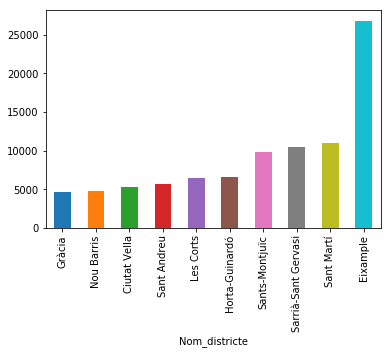

In [80]:
types[types['Nom_districte']!='Desconegut'].groupby('Nom_districte').count()['Numero_expedient'].sort_values().plot(kind='bar')

In [57]:
typ_yr_dist = types[types['Nom_districte']!='Desconegut'].groupby(['NK_Any','Nom_districte']).count()[['Numero_expedient']].reset_index()

In [58]:
typ_yr_dist.head()

,NK_Any,Nom_districte,Numero_expedient
0,2010.0,Ciutat Vella,510
1,2010.0,Eixample,2609
2,2010.0,Gràcia,536
3,2010.0,Horta-Guinardó,796
4,2010.0,Les Corts,693


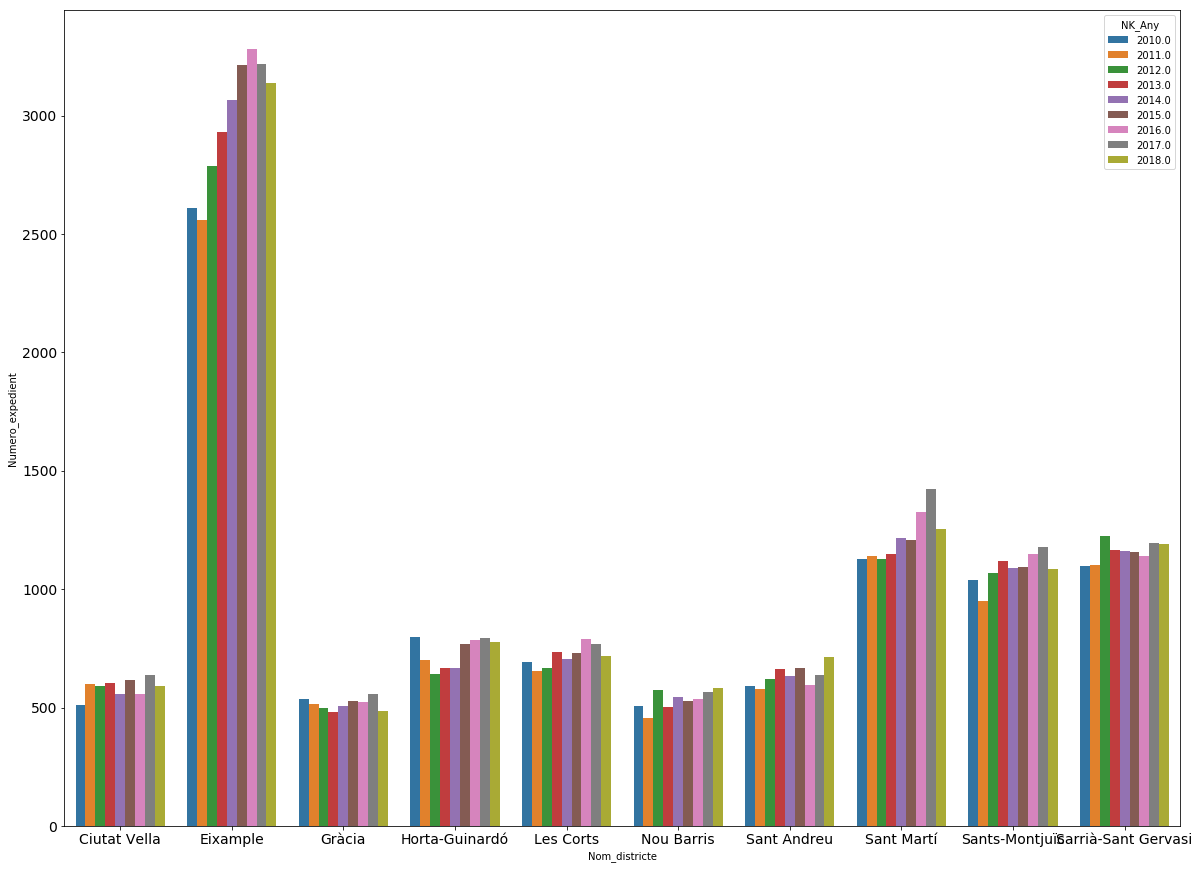

In [78]:
plt.figure(figsize=(20,15))
plt.tick_params(labelsize=14)
sns.barplot(x='Nom_districte',y='Numero_expedient',data=typ_yr_dist,hue='NK_Any')
plt.show()

In [81]:
# Comments:

# l'Eixample is clearly the district in Barcelona where there are more traffic accidents
# In addition, it seems to be the district where the number has increased more.

In [115]:
typ_yr_dist_diffs = typ_yr_dist[typ_yr_dist['NK_Any']==2018][['Nom_districte','Numero_expedient']].reset_index()

In [119]:
typ_yr_dist_diffs.drop('index',axis=1,inplace=True)

In [120]:
typ_yr_dist_diffs.columns = ['Nom_districte','Count_2018']

In [121]:
typ_yr_dist_diffs['Count_2010'] = typ_yr_dist[typ_yr_dist['NK_Any']==2010]['Numero_expedient']

In [127]:
typ_yr_dist_diffs['Diff_value'] = (typ_yr_dist_diffs['Count_2018'] - typ_yr_dist_diffs['Count_2010'])

In [128]:
typ_yr_dist_diffs['Diff_percent'] = (typ_yr_dist_diffs['Count_2018'] - typ_yr_dist_diffs['Count_2010'])/typ_yr_dist_diffs['Count_2010']*100

In [129]:
typ_yr_dist_diffs

,Nom_districte,Count_2018,Count_2010,Diff,Diff_value,Diff_percent
0,Ciutat Vella,592,510,0.160784,82,16.078431
1,Eixample,3137,2609,0.202376,528,20.237639
2,Gràcia,485,536,-0.095149,-51,-9.514925
3,Horta-Guinardó,777,796,-0.023869,-19,-2.386935
4,Les Corts,716,693,0.033189,23,3.318903
5,Nou Barris,583,506,0.152174,77,15.217391
6,Sant Andreu,714,590,0.210169,124,21.016949
7,Sant Martí,1254,1126,0.113677,128,11.367673
8,Sants-Montjuïc,1087,1039,0.046198,48,4.619827
9,Sarrià-Sant Gervasi,1190,1096,0.085766,94,8.576642


In [130]:
# Comments:

# Total number of traffic accidents have increased l'Eixample, followed by Sant Andreu and Sant Marti.
# However, the change in percentage is similar between l'Eixample and Sant Andreu, followed by Ciutat Vell and Nou Barris.

In [132]:
# Other comments:

# There are a lot of important roads passing through l'Eixample, which could justify the higher number of vehicles.
# For more info, check http://www.bcn.cat/estadistica/castella/dades/anuari/cap15/C1511020.htm

# Also, could do a test of differences between 2018 and 2010 to check whether the increase is statistically significant.

In [13]:
# def t_test(df, districts=['Ciutat Vella','Eixample','Gràcia','Horta-Guinardó','Les Corts','Nou Barris','Sant Andreu',
#                            'Sant Martí','Sants-Montjuïc','Sarrià-Sant Gervasi']):
#     results_districts = {}
#     for district in districts:
#         df_dis = df[df['Nom_districte']==district]
#         results_districts[district] = stats.ttest_ind(df_dis[df_dis['NK_Any']==2018]['Numero_expedient'], 
#                                                       df_dis[df_dis['NK_Any']==2010]['Numero_expedient'])
        
#     return results_districts

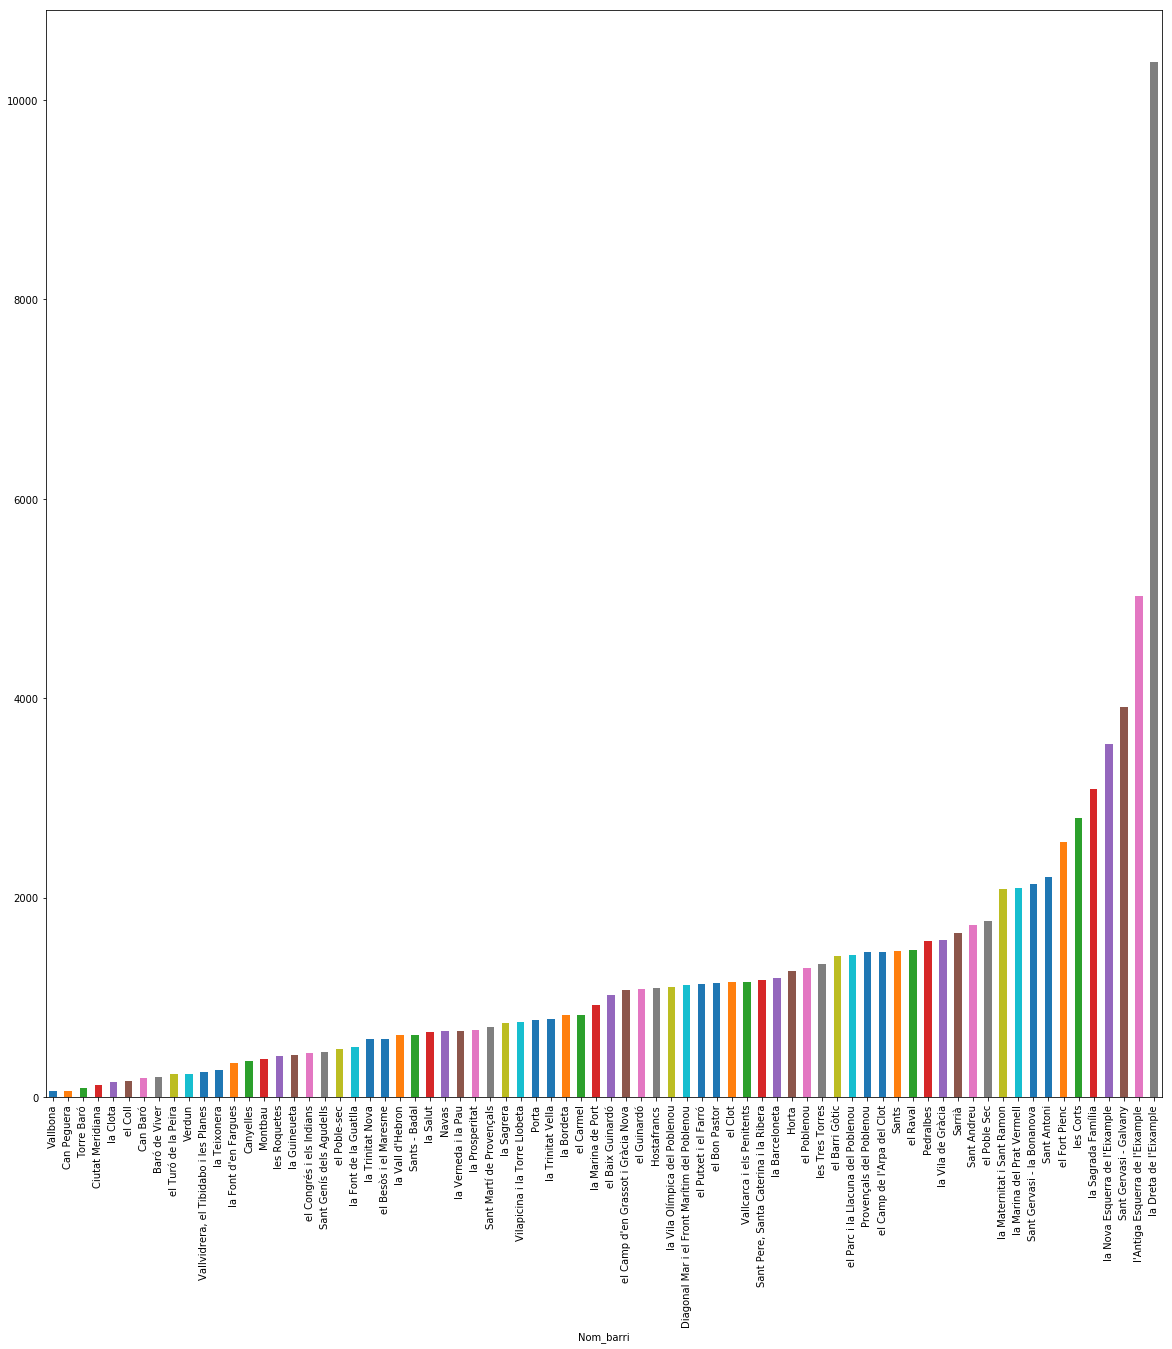

In [30]:
# Check the same but for neighborhoods

plt.figure(figsize=(20,20))
types[types['Nom_barri']!='Desconegut'].groupby('Nom_barri').count()['Numero_expedient'].sort_values().plot(kind='bar')
plt.show()

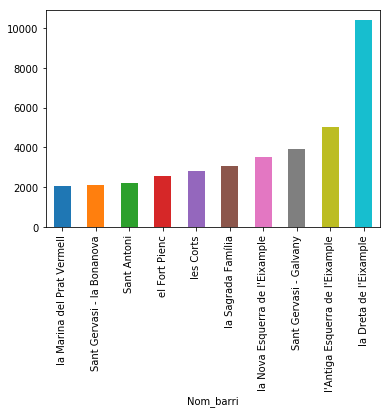

In [38]:
# Check only top 10

types[(types['Nom_barri']!='Desconegut')].groupby('Nom_barri').count()['Numero_expedient'].sort_values().tail(10).plot(kind='bar')

In [40]:
# Top neighborhoods with highest number of accidents are:
types[(types['Nom_barri']!='Desconegut')].groupby('Nom_barri').count()['Numero_expedient'].sort_values().tail(10)[::-1]

Nom_barri
la Dreta de l'Eixample             10384
l'Antiga Esquerra de l'Eixample     5022
Sant Gervasi - Galvany              3915
la Nova Esquerra de l'Eixample      3541
la Sagrada Família                  3092
les Corts                           2804
el Fort Pienc                       2555
Sant Antoni                         2207
Sant Gervasi - la Bonanova          2140
la Marina del Prat Vermell          2093
Name: Numero_expedient, dtype: int64

In [41]:
# Comments:

# Most of them are located in l'Eixample district (la Dreta de l'Eixample, l'Antiga Esquerra de l'Eixample,
# la Nova Esquerra de l'Eixample, la Sagrada Família, Sant Antoni, el Fort Pienc), 
# Sarrià-Sant Gervasi (Sant Gervasi - Galvany,Sant Gervasi - la Bonanova), and Sants-Montjuïc (la Marina del Prat Vermell)

#### Are there more accidents during a work day or during a weekend day?

In [44]:
types.head(1)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S006909,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0176 0176,Dilluns,Dl,Laboral,2010.0,10.0,Octubre,11.0,20.0,Tarda,Atropellament,"4585312,47","431736,08"


In [50]:
types['Descripcio_tipus_dia'].value_counts()
# All days registered as working days!!!
# Cannot use this information

Laboral    91583
Name: Descripcio_tipus_dia, dtype: int64

In [48]:
types['Descripcio_dia_setmana'].value_counts()

Divendres    15880
Dijous       14943
Dimecres     14863
Dimarts      14466
Dilluns      13808
Dissabte     10003
Diumenge      7620
Name: Descripcio_dia_setmana, dtype: int64

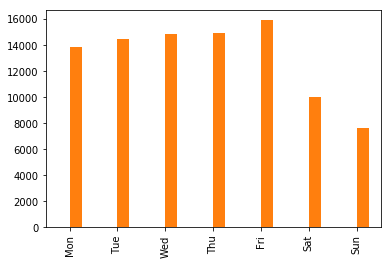

In [116]:
types['Dia_setmana_num'].value_counts().reset_index().sort_values(by='index').plot(kind='bar', legend=None)
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

In [117]:
# Comments

# There are clearly more accidents in working days than weekends.

In [212]:
accident_yr_wday.head()

,NK_Any,Descripcio_dia_setmana,Numero_expedient
0,2010.0,Dijous,1576
1,2010.0,Dilluns,1402
2,2010.0,Dimarts,1553
3,2010.0,Dimecres,1537
4,2010.0,Dissabte,1053


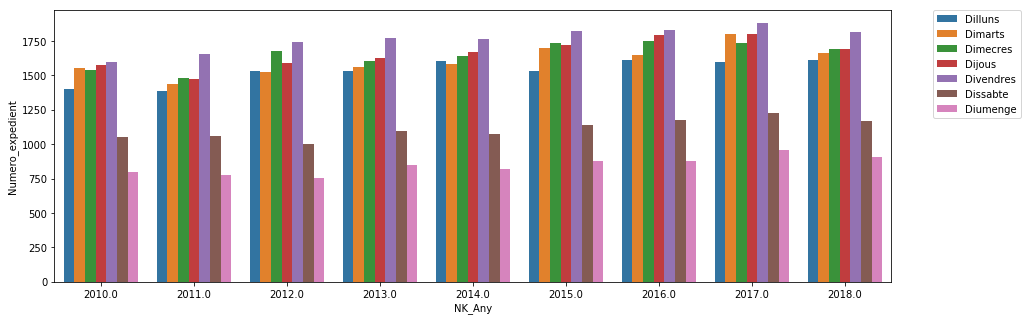

In [182]:
days=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte','Diumenge']
plt.figure(figsize=(15,5))
sns.barplot(x='NK_Any',y='Numero_expedient',data=accident_yr_wday, hue='Descripcio_dia_setmana',hue_order=days)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

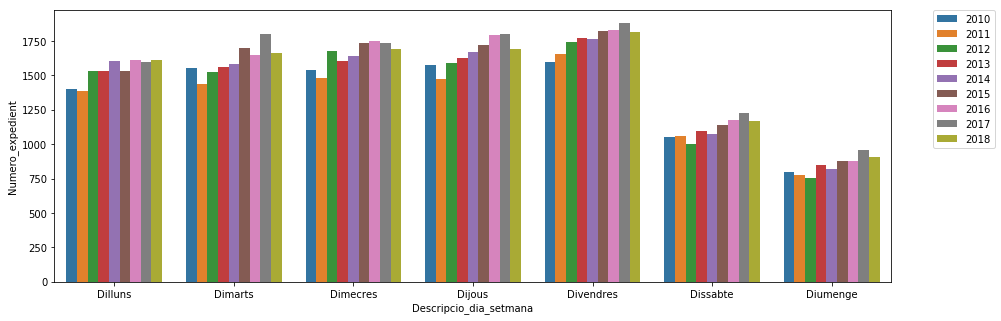

In [183]:
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018]
days=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte','Diumenge']
plt.figure(figsize=(15,5))
sns.barplot(x='Descripcio_dia_setmana',y='Numero_expedient',data=accident_yr_wday, order=days, hue='NK_Any',hue_order=years)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

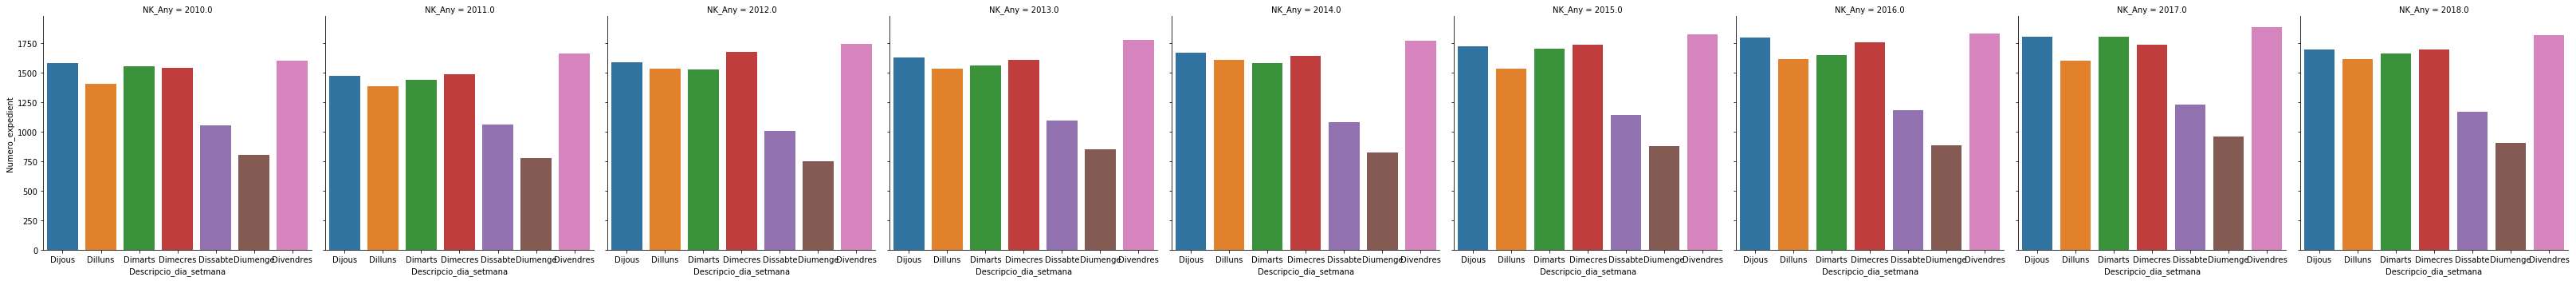

In [210]:
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018]
days=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte','Diumenge']

sns.catplot(x="Descripcio_dia_setmana", y="Numero_expedient", col="NK_Any", data=accident_yr_wday, kind="bar")
plt.show()

In [185]:
# Comments

# From the graph, the number of accidents seems to have increased similar over the days of the week

#### What is the month with more accidents?

In [192]:
types.groupby('Mes_any').count()['Numero_expedient']

Mes_any
1.0     7350
2.0     7420
3.0     7935
4.0     7668
5.0     8165
6.0     7849
7.0     7988
8.0     5733
9.0     7244
10.0    8232
11.0    8160
12.0    7839
Name: Numero_expedient, dtype: int64

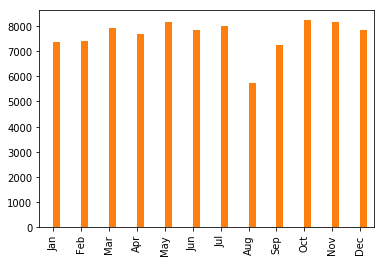

In [200]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

types['Mes_any'].value_counts().reset_index().sort_values(by='index').plot(kind='bar',legend=None)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], months)
plt.show()

In [202]:
# Comments:

# There are clearly less accidents in the month of august

In [213]:
types.head(1) 

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X,Dia_setmana_num
0,2010S006909,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0176 0176,Dilluns,Dl,...,2010.0,10.0,Octubre,11.0,20.0,Tarda,Atropellament,"4585312,47","431736,08",1.0


In [219]:
accident_month_hour = types.groupby(['Mes_any','Hora_dia']).count().reset_index()

In [220]:
accident_month_hour.head()

,Mes_any,Hora_dia,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,...,Dia_setmana,Descripcio_tipus_dia,NK_Any,Nom_mes,Dia_mes,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X,Dia_setmana_num
0,1.0,0.0,114,114,114,114,114,114,108,114,...,114,114,114,114,114,114,114,114,114,114
1,1.0,1.0,89,89,89,89,89,89,84,89,...,89,89,89,89,89,89,89,89,89,89
2,1.0,2.0,64,64,64,64,64,64,61,64,...,64,64,64,64,64,64,64,64,64,64
3,1.0,3.0,66,66,66,66,66,66,63,66,...,66,66,66,66,66,66,66,66,66,66
4,1.0,4.0,51,51,51,51,51,51,50,51,...,51,51,51,51,51,51,51,51,51,51


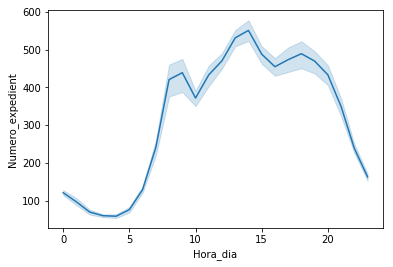

In [227]:
sns.lineplot(x='Hora_dia',y='Numero_expedient',data=accident_month_hour)

In [ ]:
# Comments

# There are more accidents during the day

In [280]:
# Now let's check the daily profile but for work days

workdays = types[types['Descripcio_dia_setmana'].isin(['Dilluns','Dimarts','Dimecres','Dijous','Divendres'])]

In [292]:
workdays_hour = workdays.groupby('Hora_dia').count()['Numero_expedient'].reset_index()

In [295]:
# Now let's check the daily profile but for work days

weekends= types[types['Descripcio_dia_setmana'].isin(['Dissabte','Diumenge'])]
weekends_hour = weekends.groupby('Hora_dia').count()['Numero_expedient'].reset_index()

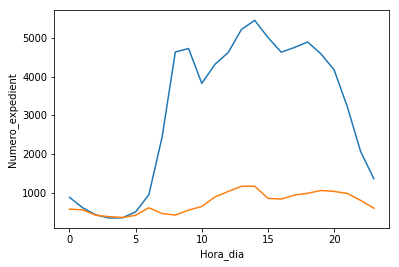

In [296]:
sns.lineplot(x='Hora_dia',y='Numero_expedient',data=workdays_hour)
sns.lineplot(x='Hora_dia',y='Numero_expedient',data=weekends_hour)

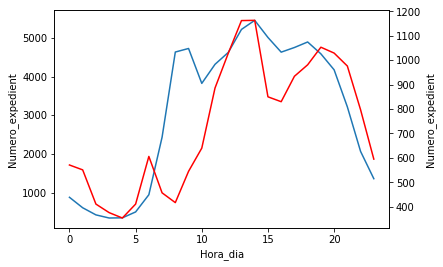

In [304]:
ax = sns.lineplot(x="Hora_dia", y="Numero_expedient", data=workdays_hour)
ax2 = ax.twinx()
sns.lineplot(x="Hora_dia", y="Numero_expedient", ax=ax2, data=weekends_hour, color='red')
plt.show()

In [307]:
# Let's see if there is difference between Saturdays and Sundays:

saturdays= types[types['Descripcio_dia_setmana']=='Dissabte']
saturdays_hour = saturdays.groupby('Hora_dia').count()['Numero_expedient'].reset_index()

sundays= types[types['Descripcio_dia_setmana']=='Diumenge']
sundays_hour = sundays.groupby('Hora_dia').count()['Numero_expedient'].reset_index()

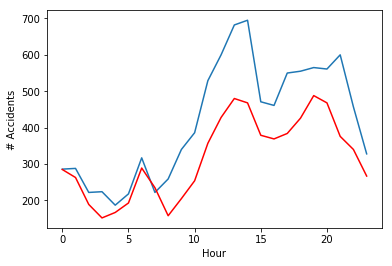

In [325]:
ax = sns.lineplot(x="Hora_dia", y="Numero_expedient", data=saturdays_hour)
sns.lineplot(x="Hora_dia", y="Numero_expedient", data=sundays_hour, color='red')
ax.set_ylabel('# Accidents')
ax.set_xlabel('Hour')
plt.show()

In [ ]:
# Comments

# The daily profile between the workdays and weekdays is clearly different.
# During the workdays, there are three distinguised peaks: the morning (8-9h), midday (13h), and afternoon (17h)

# During the weekdays, there is a morning peak around 5-7h (maybe related to people coming back from partying), midday(12-13h)
# and late afternoon (18-20h)

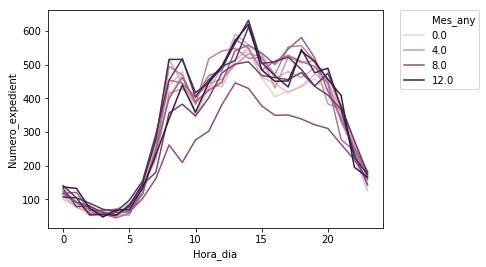

In [230]:
sns.lineplot(x='Hora_dia',y='Numero_expedient',data=accident_month_hour, hue='Mes_any')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

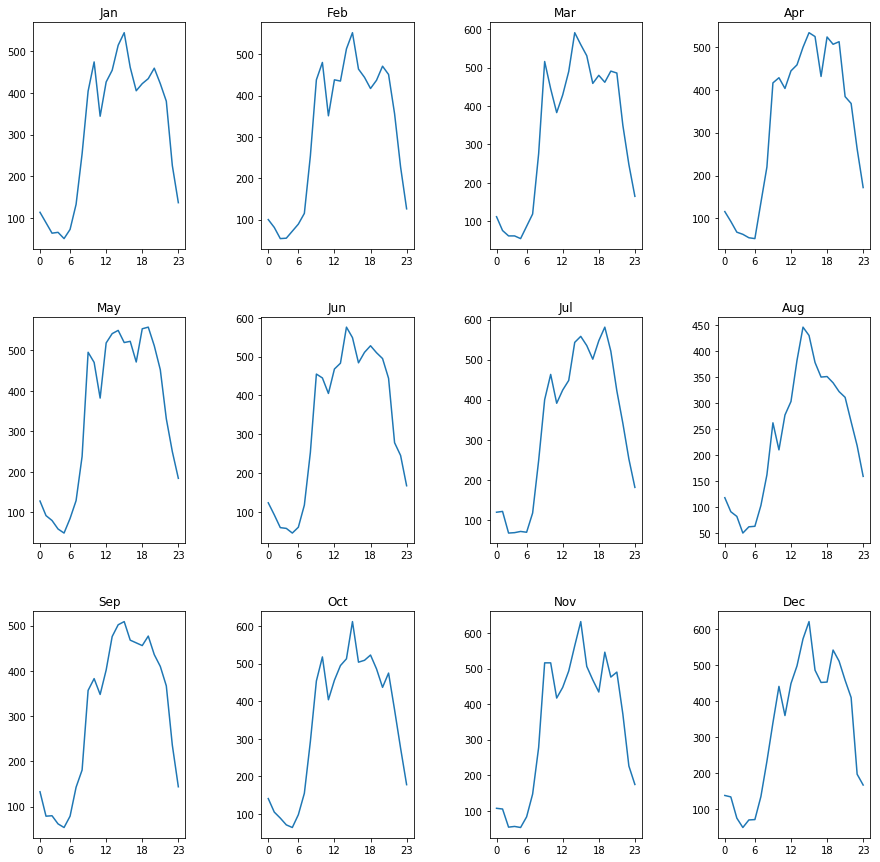

In [272]:
f, axes = plt.subplots(3, 4,figsize=(15,15))
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

month = 1
for row in range(3):
    for col in range(4):
        sns.lineplot(x='Hora_dia',y='Numero_expedient',data=accident_month_hour[accident_month_hour['Mes_any']==month],ax=axes[row,col])
        axes[row,col].set_xlabel('')
        axes[row,col].set_ylabel('')
        axes[row,col].set_title(month_dict[month])
        axes[row,col].set_xticks([0,5,11,17,23])
        axes[row,col].set_xticklabels([0,6,12,18,23])
        month += 1
        
f.subplots_adjust(wspace=0.5, hspace=0.3)

plt.show()

In [ ]:
# Comments:

